In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/cf391fa1a7babe490fdd10c088f0ca1b6d377f59/shopping-data.csv", header=0, index_col=0)
print(data.shape)
data.head()

(200, 4)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
data.isnull().sum()

,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#TIỀN XỬ LÝ DỮ LIỆU

In [ ]:
# Kiểm tra số lượng giá trị thiếu trong mỗi cột
print(data.isnull().sum())

# Hoặc kiểm tra phần trăm giá trị thiếu
missing_percent = data.isnull().mean() * 100
print(missing_percent)


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


In [ ]:
# Chọn các cột số
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Dùng IQR để xác định outliers
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Outliers là những điểm nằm ngoài [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = (data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))

# Đếm số outliers theo từng cột
print(outliers.sum())


Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Xóa các hàng có bất kỳ outlier nào
data_no_outliers = data[~outliers.any(axis=1)]
print(data_no_outliers.shape)


(198, 4)


In [ ]:
print(data_no_outliers.isnull().sum())


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = data_no_outliers.copy()

# Chỉ scale các cột số
data_scaled[numerical_cols] = scaler.fit_transform(data_scaled[numerical_cols])

print(data_scaled.head())


             Genre       Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                              
1             Male -1.425414           -1.779171               -0.435989
2             Male -1.282367           -1.779171                1.199413
3           Female -1.353890           -1.739447               -1.720949
4           Female -1.139319           -1.739447                1.043661
5           Female -0.567131           -1.699723               -0.397051


# THUẬT TOÁN DBSCAN

In [ ]:
# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values
print(X.shape)

(200, 2)


In [ ]:
std = MinMaxScaler()
X_std = std.fit_transform(X)

In [ ]:
DBSCAN(eps=0.5,
 min_samples=5,
 metric='euclidean',
 algorithm='auto'
)

DBSCAN()

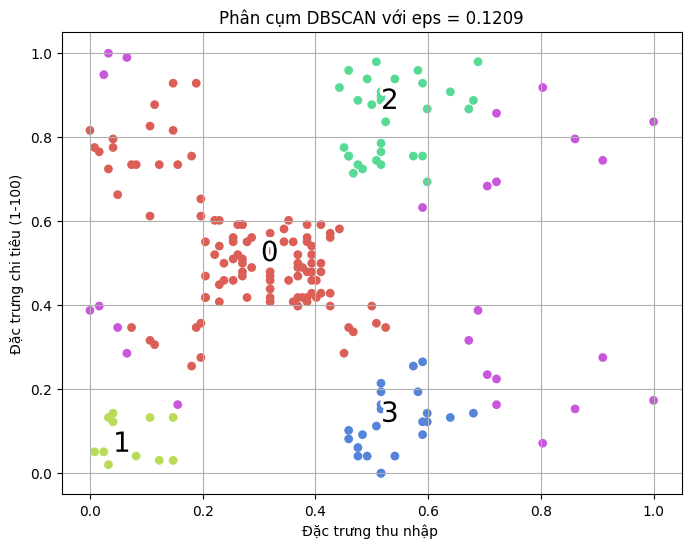

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.cluster import DBSCAN
import matplotlib.patheffects as PathEffects
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

# Hàm vẽ scatter với nhãn cụm
def _plot_kmean_scatter(X, labels, thres):
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    plt.figure(figsize=(8, 6))
    sc = plt.scatter(X[:, 0], X[:, 1], lw=0, s=40, c=palette[labels.astype(np.int32)])

    for i in range(num_classes):
        indices = (labels == i)
        xtext, ytext = np.median(X[indices, :], axis=0)
        if not (np.isnan(xtext) or np.isnan(ytext)):
            txt = plt.text(xtext, ytext, str(i), fontsize=20)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])

    plt.title('Phân cụm DBSCAN với eps = {:.4f}'.format(thres))
    plt.xlabel("Đặc trưng thu nhập ")
    plt.ylabel("Đặc trưng chi tiêu (1-100)")
    plt.grid(True)
    plt.show()

# Thực hiện DBSCAN với eps = 0.1209
eps_value = 0.1209
dbscan = DBSCAN(eps=eps_value, min_samples=11, metric='euclidean')
labels = dbscan.fit_predict(X_std)  # dùng dữ liệu đã chuẩn hóa

# Vẽ biểu đồ
_plot_kmean_scatter(X_std, labels, eps_value)


# THỬ NGHIỆM

In [ ]:
from sklearn.cluster import DBSCAN

# ĐỘ ĐÁNH GIÁ

In [ ]:
from sklearn.cluster import DBSCAN

# Assuming 'data' is your Pandas DataFrame and 'X_std' is the standardized data
dbscan = DBSCAN(eps=0.12, min_samples=11, metric='euclidean')
labels = dbscan.fit_predict(X_std)

# Add the cluster labels to your DataFrame
data['Cluster'] = labels

# Now you can use groupby on the DataFrame
cluster_sizes = data.groupby('Cluster').size()
print(cluster_sizes)

Cluster
-1     25
 0    110
 1     11
 2     31
 3     23
dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values

# Tiêu chuẩn hóa dữ liệu
std = MinMaxScaler()
X_std = std.fit_transform(X)

# Xây dựng mô hình DBSCAN
DBS_clustering = DBSCAN(eps=0.12, min_samples=11, metric='euclidean').fit(X_std)

# Tính toán davies_bouldin_score
davies_bouldin_score(X_std, DBS_clustering.labels_)

np.float64(1.6425801464717051)

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X_std, DBS_clustering.labels_)


np.float64(64.45412325877625)

# **k** **means**


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_numerics = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()


In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()


In [ ]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [ ]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your Pandas DataFrame
# If 'data' is not loaded, you need to load it first
# For example: data = pd.read_csv('your_data_file.csv')

# Define X_numerics
X_numerics = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X_numerics)

# -------------------- KMEANS --------------------
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)

# Đánh giá KMeans
kmeans_silhouette = silhouette_score(X_std, kmeans_labels)
kmeans_davies = davies_bouldin_score(X_std, kmeans_labels)
kmeans_ch = calinski_harabasz_score(X_std, kmeans_labels)

# -------------------- DBSCAN --------------------
dbscan = DBSCAN(eps=0.1209, min_samples=11)
dbscan_labels = dbscan.fit_predict(X_std)

# Lọc điểm nhiễu ra (label = -1) nếu cần
mask = dbscan_labels != -1
X_filtered = X_std[mask]
labels_filtered = dbscan_labels[mask]

# Đánh giá DBSCAN (chỉ đánh giá các điểm không nhiễu)
dbscan_silhouette = silhouette_score(X_filtered, labels_filtered)
dbscan_davies = davies_bouldin_score(X_filtered, labels_filtered)
dbscan_ch = calinski_harabasz_score(X_filtered, labels_filtered)

# -------------------- So sánh --------------------
results = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'],
    'KMeans': [kmeans_silhouette, kmeans_davies, kmeans_ch],
    'DBSCAN': [dbscan_silhouette, dbscan_davies, dbscan_ch]
})

print(results)

In [ ]:

import pandas as pd
from pyclustering.cluster.clarans import clarans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your Pandas DataFrame

# Select only numerical features for clustering
X_numerics = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X_numerics)

# Prepare data for CLARANS - convert to list of lists
df_raw = X_std.tolist() # Use the scaled numerical data

# CLARANS parameters
n_clusters = 5
num_local = 3
max_neighbor = 10

# Create and run CLARANS
clarans_instance = clarans(df_raw, n_clusters, num_local, max_neighbor)
clarans_instance.process()
clusters = clarans_instance.get_clusters()

# Create cluster labels
clarans_labels = [0] * len(df_raw)
for idx, cluster in enumerate(clusters):
    for point in cluster:
        clarans_labels[point] = idx

# Evaluate the clustering
sil_score_clarans = silhouette_score(X_std, clarans_labels)
db_score_clarans = davies_bouldin_score(X_std, clarans_labels)

print("CLARANS - Silhouette Score:", sil_score_clarans)
print("CLARANS - Davies-Bouldin Index:", db_score_clarans)